<a href="https://colab.research.google.com/github/JihedSioud/ML-DL-examples/blob/main/Unsupervised_Learning_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This assigments assumes you've been (at least partly) through [Assignment 1](https://colab.research.google.com/drive/132p1bYleoq71Za1gz7_iP5nDnRPKWeFo) which contains information about the assignment submission process. Basically you need to make a copy of the Python notebook and register it in the [assignments spreadsheet](https://docs.google.com/spreadsheets/d/1PDU5qpydm2psfCTbCu47lYSPKETS9h__ZsVm9BgQFJ4), after ensuring that my email `karolos.potamianos@cern.ch` has access.

***Please don't forget to tell me who you are:***

**NAME:Jihed Sioud**

**EMAIL:Jihed.sioud@gmail.com**

# Clustering data points

In this assigmnent you'll show me which algorithms can be used to cluster some data points that have no known label.

We start, as usual, by importing some modules.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.datasets import make_blobs

And we generate our dataset

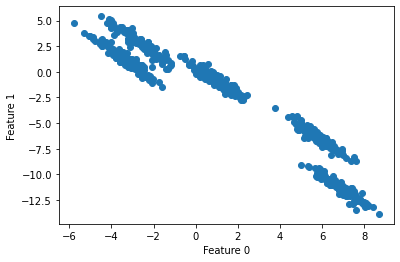

In [ ]:
# Generate some random cluster data
X, y = make_blobs(random_state=170, n_samples=600, centers = 5)
rng = np.random.RandomState(74)

# Transform the data to be stretched
transformation = rng.normal(size=(2, 2))
X = np.dot(X, transformation)

# Plot
plt.scatter(X[:, 0], X[:, 1])
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.show()

This is a fonction to show how your model performs.

In [ ]:
def show_model_prediction(model, X):
  labels = model.fit_predict(X)
  plt.scatter(X[:, 0], X[:, 1], c=labels,
            s=50, cmap='viridis');

## Clustering algorithms from class

Please try out a few of the algorithms we used in class and in the tutorials.

You can use the code snippet below to show your model's prediction.

### Clustering Algorithm #1

Please describe the algorithm you intended to use and tell me why you chose it.

**Answer: K-means is a type of unsupervised machine learning algorithm that is used for clustering. The basic idea behind K-means is to partition a set of n observations into k clusters, where each observation belongs to the cluster with the nearest mean. The algorithm works by iteratively reassigning each observation to the cluster with the closest mean and then recomputing the means of each cluster until the cluster assignments no longer change.**

**The advantages of using K-means :**

**-K-means is relatively simple to implement and understand, making it a popular choice for many applications.**

**-Computationally efficient: K-means scales well to large datasets and can be easily parallelized, making it a fast and efficient algorithm.**

**-Handling non-linearly separable data: K-means can handle non-linearly separable data by using distance-based approach.**


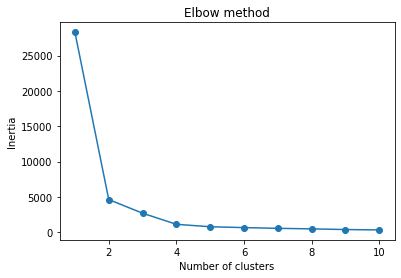

In [ ]:
inertias=[]
from sklearn.cluster import KMeans
for i in range(1,11):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(X)
    inertias.append(kmeans.inertia_)

plt.plot(range(1,11), inertias, marker='o')
plt.title('Elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

optimal nb cluster =4

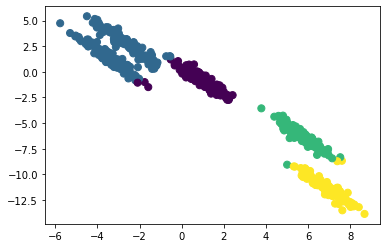

In [ ]:
kmeans_model = KMeans(n_clusters=4, init=init)
show_model_prediction(kmeans_model, X)

In [ ]:
init_list = ["k-means++", "random"]
inertia_list = []
for init in init_list:
    kmeans_model = KMeans(n_clusters=4, init=init)
    kmeans_model.fit(X)
    inertia_list.append(kmeans_model.inertia_)

results = pandas.DataFrame(data=inertia_list, columns=["Inertia Value"], index=init_list)
results

,Inertia Value
k-means++,1124.038173
random,1124.038173


**The Inertia value can also be used for finding better hyperparameters for the unsupervised K-Means algorithm. One potential hyperparameter is the initialization method. In Scikit-Learn, there are two different possibilities. One is called k-means++ and one is called random. But which initialization should be used? In order to answer this question, one could train one K-Means model for each initialization strategy and compare its Inertia values. The strategy leading to a smaller Inertia value can then be used as optimal sttrqtegie
As one can see, the random initialization achieves a slightly smaller Inertia value and could here be used as the optimal initialization strategy.**



### Clustering Algorithm #2

Please describe the algorithm you intended to use and tell me why you chose it.

**Answer: DBSCAN (Density-Based Spatial Clustering of Applications with Noise) is a density-based clustering algorithm that groups together observations that are closely packed together (points with many nearby neighbors), and marks as outliers the points that are in low-density regions.**

**The algorithm works by defining a neighborhood around each point, and then grouping together all points that are closely packed together. The algorithm has two main parameters: Eps, the radius of the neighborhood, and MinPts, the minimum number of points in the neighborhood.**

**The advantages of using DBSCAN include:**

**-Handling non-linearly separable data: DBSCAN is particularly good at handling non-linearly separable data and discovering clusters of arbitrary shape.**

**-Handling high-dimensional data: DBSCAN can handle high-dimensional data, which is a common problem in many applications.**

**-Handling noise and outliers: DBSCAN can identify and exclude noise and outliers from the clustering process.**

**-Handling variable density clusters: DBSCAN can identify clusters with varying densities, unlike k-means, which assumes that clusters have similar densities.**

**-Handling large and complex datasets: DBSCAN can handle large and complex datasets, making it a suitable algorithm for big data applications.**

**-No need to specify number of clusters: Unlike k-means, DBSCAN does not require the number of clusters to be specified in advance.**

**-Being a density-based method, it is more robust to the structure of the data, and can identify clusters of different densities and shapes.**

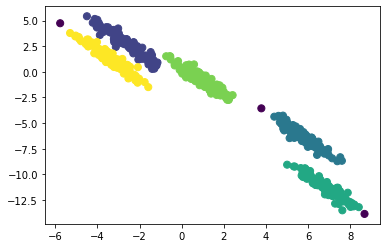

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN

clustering = DBSCAN(eps=0.55, min_samples=2).fit(X)
DBSCAN_dataset = X.copy()


show_model_prediction(clustering, X)



# Instantiate and fit your model here
# model_2 =
# model_2.fit(X)
# show_model_prediction(model_2, X)

## New clustering algorithms

Please try out a few of the algorithms we did not use in class. Have a look [here](https://scikit-learn.org/stable/modules/clustering.html#clustering) for inspiration.

You can use the code snippet below to show your model's prediction.

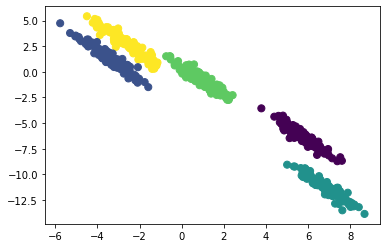

In [ ]:
import numpy as np
from sklearn.mixture import GaussianMixture

GMM = GaussianMixture(n_components=5,n_init=4, random_state=4,tol=0.000000005).fit(X)

show_model_prediction(GMM, X)

# Wrapping up

What did you take out from this?

**Answer:Different unsupervised learning algorithms can have different performances depending on the classified data distribution. The choice of the algorithm to use should be concidered carfully depending of the problem at hand**